# <center> <span style="color: #7f1cdb;"><b>Tensor Networks Tutorials</b></span>

## <span style="color: #e6023e;"><b>Library</b></span>

In [1]:
import numpy as np

from numpy import linalg as LA
from ncon import ncon

## <span style="color: #e6023e;"><b>Tensor contractions</b></span>

### <span style="color: #3b23ff;"><b>Different ways to initialize a tensor</b></span>

In [4]:
# Random integer tensor of rank 3 and dimensions: (2, 3, 4)

A = np.random.rand(2,3,4)

# Rank 2 and 5x5 identity matrix

B = np.eye(5,5)

# Tensor of 1 of rank 4 of dimensions: (2, 4, 2, 4)

C = np.ones((2,4,2,4))

# Matrix of zeros of rank 2 and dimensions: (3, 5)

D = np.zeros((3,5))

# Complex tensor of rank 3 and dimensions: (2, 3, 4)

E = np.random.rand(2,3,4) + 1j*np.random.rand(2,3,4)

### <span style="color: #3b23ff;"><b>Permutation and reshaping operations</b></span>

In [5]:
# Tensor A of rank 4 of dimensions: (4, 4, 4, 4, 4)

A = np.random.rand(4,4,4,4)

# Tensor A with permuted indices (0, 1, 2, 3) --> (3, 0, 1, 2)

Atilda = A.transpose(3,0,1,2)

# Tensor reordered to matrix

B = np.random.rand(4,4,4)

# Matrix obtained from the tensor after grouping indices

Btilda = B.reshape(4,4**2)

### <span style="color: #3b23ff;"><b>Binary tensor contractions</b></span>

![Contraccion tensor binario.png](<attachment:Contraccion tensor binario.png>)
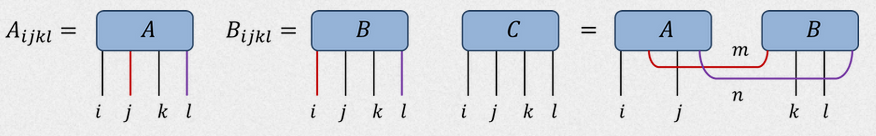

In [4]:
d = 10
A = np.random.rand(d,d,d,d)  
B = np.random.rand(d,d,d,d)

# Reorder indexes

Ap  = A.transpose(0,2,1,3)
Bp = B.transpose(0,3,1,2)

# We group indexes

App = Ap.reshape(d**2,d**2)
Bpp = Bp.reshape(d**2,d**2)

# We contract tensor

Cpp = App @ Bpp

# Ungroup and recover the desired rank tensor
            
C   = Cpp.reshape(d,d,d,d)

### <span style="color: #3b23ff;"><b>Contraction of tensor networks</b></span>

![Contraccion red tensorial.png](<attachment:Contraccion red tensorial.png>)
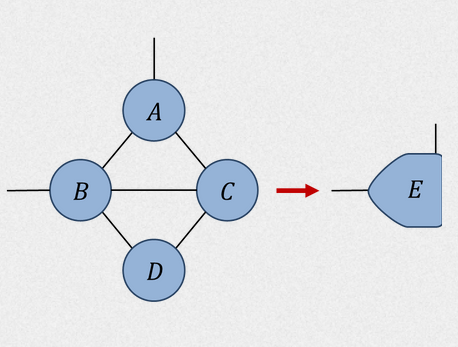

![Contraccion red tensorial etiquetas.png](<attachment:Contraccion red tensorial etiquetas.png>)
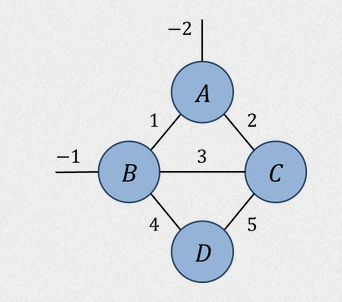

In [5]:
d = 10
A = np.random.rand(d,d,d)
B = np.random.rand(d,d,d,d)
C = np.random.rand(d,d,d)
D = np.random.rand(d,d)

TensorArray = [A,B,C,D]
IndexArray = [[1,-2,2],[-1,1,3,4],[5,3,2],[4,5]]

E = ncon(TensorArray,IndexArray)

## <span style="color: #e6023e;"><b>Tensor Decompositions - SVD</b></span>

**Ejercicio 2**

Aplicación del metodo SVD a un tensor generico y obtención del tensor postrior a la aplicación del metodo SVD sin truncamiento y con truncamiento.

![SDV Ejer 2.png](<attachment:SDV Ejer 2.png>)
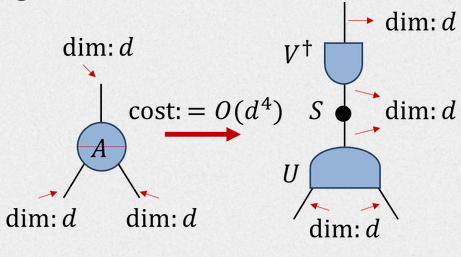

In [8]:
# Definimos la dimesión

d = 10

# Generamos un tensor de rango 3

A = np.random.rand(d,d,d)

# Reagrupampos los indices del tensor para tranformarlo a matriz para la SVD

Am = A.reshape(d**2,d)

# Aplicamos el metodo SVD

Um, Sm, Vh = LA.svd(Am,full_matrices=False)

# Volvemos a convertir a U en tensor

U = Um.reshape(d,d,d) 

# Creamos la matriz diagonal de valores singulares

S = np.diag(Sm)

# Contraemos tensor

Af = ncon([U,S,Vh],[[-1,-2,1],[1,2],[2,-3]])
dA = LA.norm(Af-A)

print('Overlap entre Af y A:', dA)

Overlap entre Af y A: 8.765138211706499e-14


In [9]:
# Realizamos el mismo procedimiento pero generando un truncamiento al aplicar el metodo SVD para reducir la dimensionalidad del sistema
# Definimos la dimesión

d = 10

# Generamos un tensor de rango 3

A = np.random.rand(d,d,d)

# Reagrupampos los indices del tensor para tranformarlo a matriz para la SVD

Am = A.reshape(d**2,d)

# Truncamos la matriz S para reducir la dimensión de la matriz

for j in range(d + 1):
    
    Um, Sm, Vh = LA.svd(Am,full_matrices=False)

    for i in range(j, len(Sm)):
        Sm[i] = 0

    U = Um.reshape(d,d,d) 
    S = np.diag(Sm)

    # Contraemos tensor

    Af = ncon([U,S,Vh],[[-1,-2,1],[1,2],[2,-3]])
    dA = LA.norm(Af-A)

    print('Overlap entre Af y A:', dA)



Overlap entre Af y A: 18.215371758671477
Overlap entre Af y A: 8.57828451092276
Overlap entre Af y A: 7.761218714659284
Overlap entre Af y A: 7.101177612700055
Overlap entre Af y A: 6.392531658691875
Overlap entre Af y A: 5.667444616660384
Overlap entre Af y A: 4.930436080025812
Overlap entre Af y A: 4.155563241297999
Overlap entre Af y A: 3.2158549336479516
Overlap entre Af y A: 2.1250529357082266
Overlap entre Af y A: 1.141286101714939e-13


In [10]:
# Truncamiento de tensor

d = 10
A = np.random.rand(d,d,d,d,d)
Um, S, Vhm = LA.svd(A.reshape(d**3,d**2),full_matrices=False)

U = Um.reshape(d,d,d,d**2)
Vh = Vhm.reshape(d**2,d,d)

# Truncamiento dependiente de chi

chi = 1

Vhtilda = Vh[:chi,:,:]
Stilda = np.diag(S[:chi])
Utilda = U[:,:,:,:chi]

B = ncon([Utilda,Stilda,Vhtilda],[[-1,-2,-3,1],[1,2],[2,-4,-5]])

# Comparación del overlap

overlap = LA.norm(B - A) / LA.norm(A)
print(overlap)

0.496800280539766
